### Initial ML model for dust detection

Using a very limited dataset (<10 training and validation images), we've attempted to train a model that would automatically detect dust on the surface of any solar panel. Hoping for better accuracy, we've fed our model images that have already gone through the Otsu segmentation process in a Gray format.

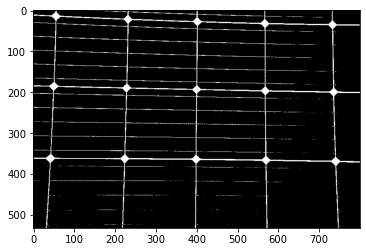

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

DATADIR=r'C:\Users\Asus\Desktop\solar panels\train'
CATEGORIES=['clean','dirty']

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(img_array, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        plt.imshow(thresh, cmap='gray')
        break
    break

In [198]:
print(thresh.shape)

(533, 800)


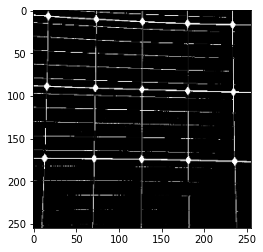

In [199]:
IMG_SIZE=255
new_array= cv2.resize(thresh,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')


In [200]:
training_data =[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ret, thresh = cv2.threshold(img_array, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #appending segmented images to the array
                new_array=cv2.resize(thresh,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(training_data)

[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0], [array([[190,  12,   0, ...,   0,   0,   0],
       [218, 247,  37, ...,   0,   0,   0],
       [  0, 154, 213, ...,   0,   0,   0],
       ...,
       [ 68, 255, 255, ..., 255, 255, 255],
       [ 68, 255, 255, ..., 255, 255, 255],
       [ 68, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0], [array([[255, 255, 255, ..., 232,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8), 0], [array([[217, 217, 217, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 

In [201]:
import random
random.shuffle(training_data)
X= []
Y= []

for image,label in training_data:
    X.append(image)
    Y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y=np.array(Y)

### Logistic regression

In [202]:
nsamples, nx, ny, nrgb = X.shape
train_dataset = X.reshape((nsamples,nx*ny))

In [203]:
testing_data =[]
DATADIR=r'C:\Users\Asus\Desktop\solar panels\test'
def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ret, thresh = cv2.threshold(img_array, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                new_array=cv2.resize(thresh,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [205]:
X_testing= []
Y_testing= []

for image,label in testing_data:
    X_testing.append(image)
    Y_testing.append(label)
    
X_testing=np.array(X_testing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y_testing=np.array(Y_testing)
X_testing=X_testing/255.0


In [206]:
from sklearn.linear_model import LogisticRegression

lr_classifier=LogisticRegression(max_iter=200)
lr_classifier.fit(train_dataset,Y)

LogisticRegression(max_iter=200)

In [225]:
from sklearn.metrics import f1_score

print(f1_score(Y_testing, lr_classifier.predict(test_dataset), average=None))
print(lr_classifier.score(test_dataset,Y_testing))

[0.75 0.75]
0.75


As we can see, the lack of data makes our model underperform when it comes to accuracy even though the testing sample is very small. We can also train a model using Keras and Tensorflow which will most probably barely perform any better, if not worse. Since Logistic Regression would be the most adequate algorithm for limited datasets.

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras

In [157]:
X=X/255.0

In [174]:
model=Sequential()
# model.add(Conv2D(32,(2,2),input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32,(2,2),input_shape=X.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X,Y, batch_size=1, epochs=5)

#Parameters to be fine-tuned

In [176]:
#model.evaluate(X_testing,Y_testing)